In [1]:
import os, sys, imio, tifffile
from skimage.io import imread, imread_collection, concatenate_images
import skimage
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import ndimage
from matplotlib import colors
from tqdm import tqdm
from cellfinder.analyse import analyse as cfa
from bg_atlasapi.bg_atlas import BrainGlobeAtlas

In [56]:
def open_binarised_coordinates(name):
    path = f'braintracer/fluorescence/binary_{name}.npy'
    assert os.path.isfile(path), f'Please provide binarised stack coordinates at {path}'
    coordinates = np.load(path)
    return coordinates

In [13]:
channel_signal_name = 'r'
channel_background_name = 'b'
network_nickname = 'bt14'
binary_thresh = np.sqrt(1000)
med_filter_iters = 3
atlas = BrainGlobeAtlas('allen_mouse_10um')

In [14]:
datasets = ['SC013','SC015','SC020','SC022','SC014','SC023','SC048','SC049']

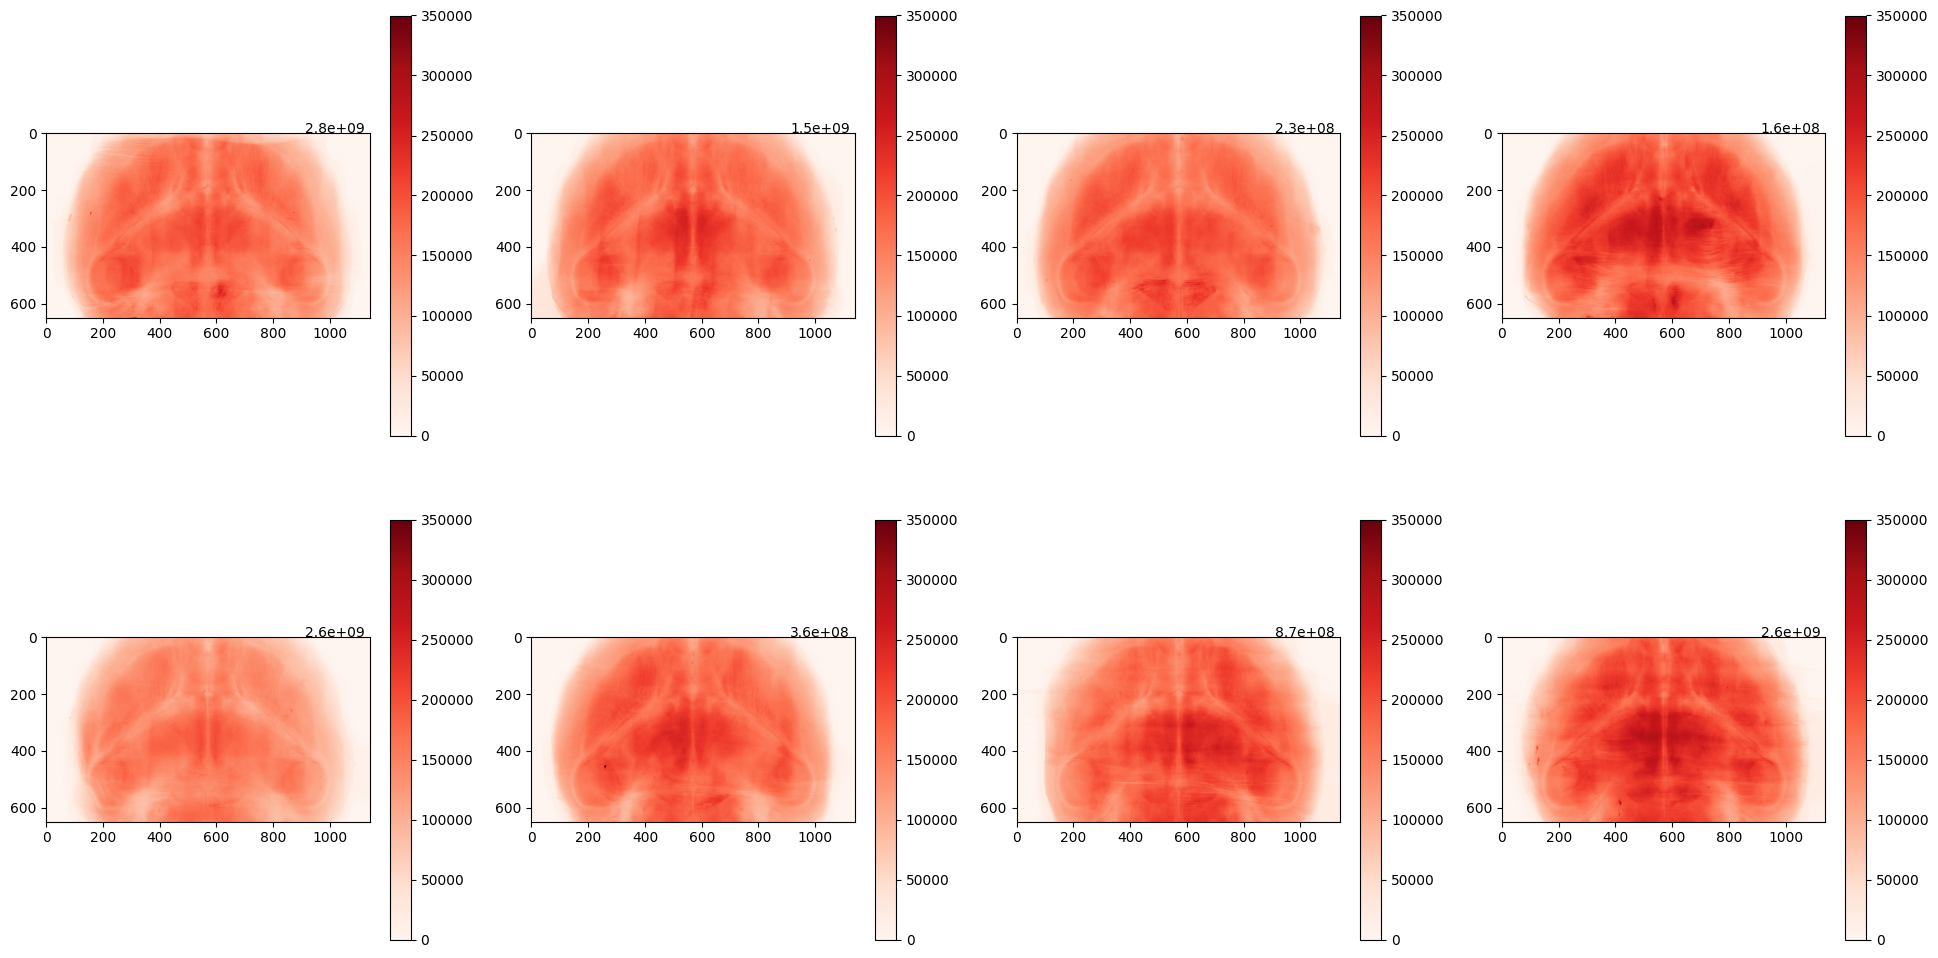

In [39]:
row_width = int(len(datasets)/2)
f, axs = plt.subplots(2, row_width, figsize=(row_width*6, 12))

for i, dataset in enumerate(datasets):
    foreg = imread(f'braintracer/downsampled_data/reg_{dataset}_{channel_signal_name}.tiff')
    #backg = imread(f'braintracer/downsampled_data/reg_{dataset}_{channel_background_name}.tiff')
    subslice = foreg[350:1000,:,:]
    im = np.sum(subslice, axis=1)
    row = 1 if i >= row_width else 0
    col = int(i % row_width)
    ax = axs[row, col]
    cax = ax.imshow(im, cmap='Reds', vmax=350_000)
    plt.colorbar(cax)
    total_signal = np.sum(subslice.flatten())
    ax.text(float(ax.get_xlim()[1]) * 0.8, float(ax.get_ylim()[1]) * 0.6, f'{total_signal:.2g}')

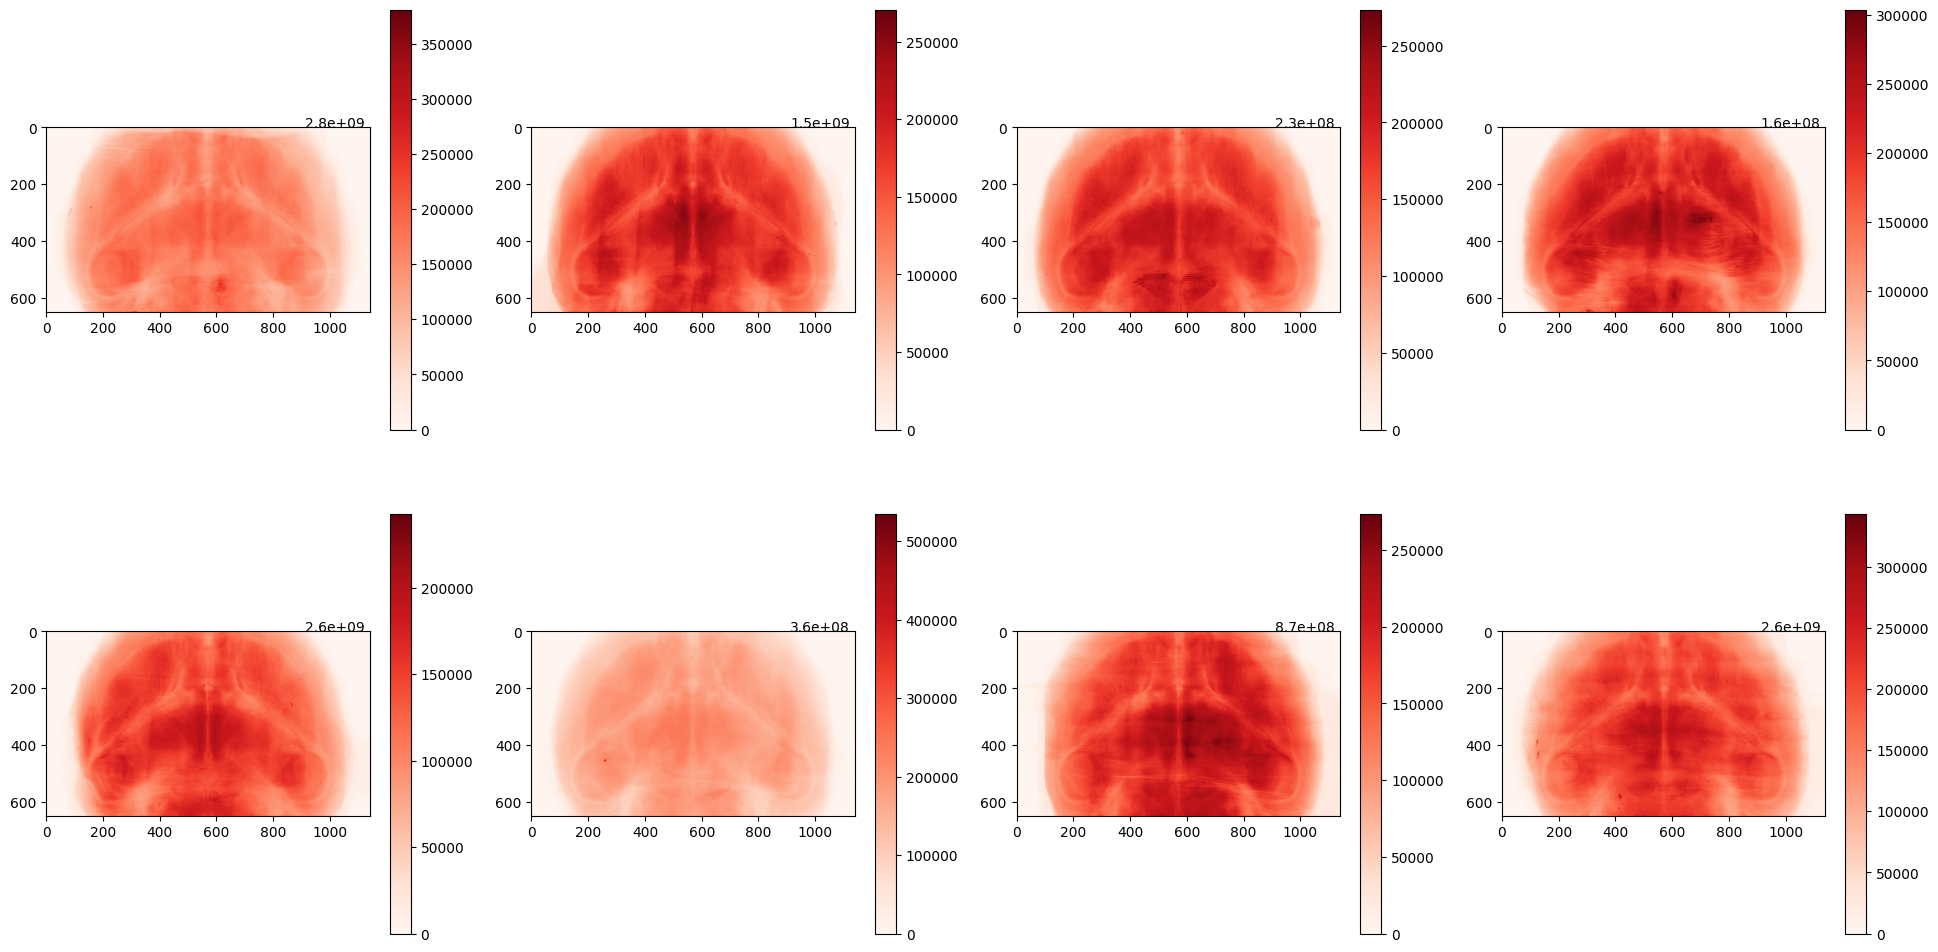

In [40]:
row_width = int(len(datasets)/2)
f, axs = plt.subplots(2, row_width, figsize=(row_width*6, 12))

for i, dataset in enumerate(datasets):
    foreg = imread(f'braintracer/downsampled_data/reg_{dataset}_{channel_signal_name}.tiff')
    #backg = imread(f'braintracer/downsampled_data/reg_{dataset}_{channel_background_name}.tiff')
    subslice = foreg[350:1000,:,:]
    im = np.sum(subslice, axis=1)
    row = 1 if i >= row_width else 0
    col = int(i % row_width)
    ax = axs[row, col]
    cax = ax.imshow(im, cmap='Reds')
    plt.colorbar(cax)
    total_signal = np.sum(subslice.flatten())
    ax.text(float(ax.get_xlim()[1]) * 0.8, float(ax.get_ylim()[1]) * 0.6, f'{total_signal:.2g}')

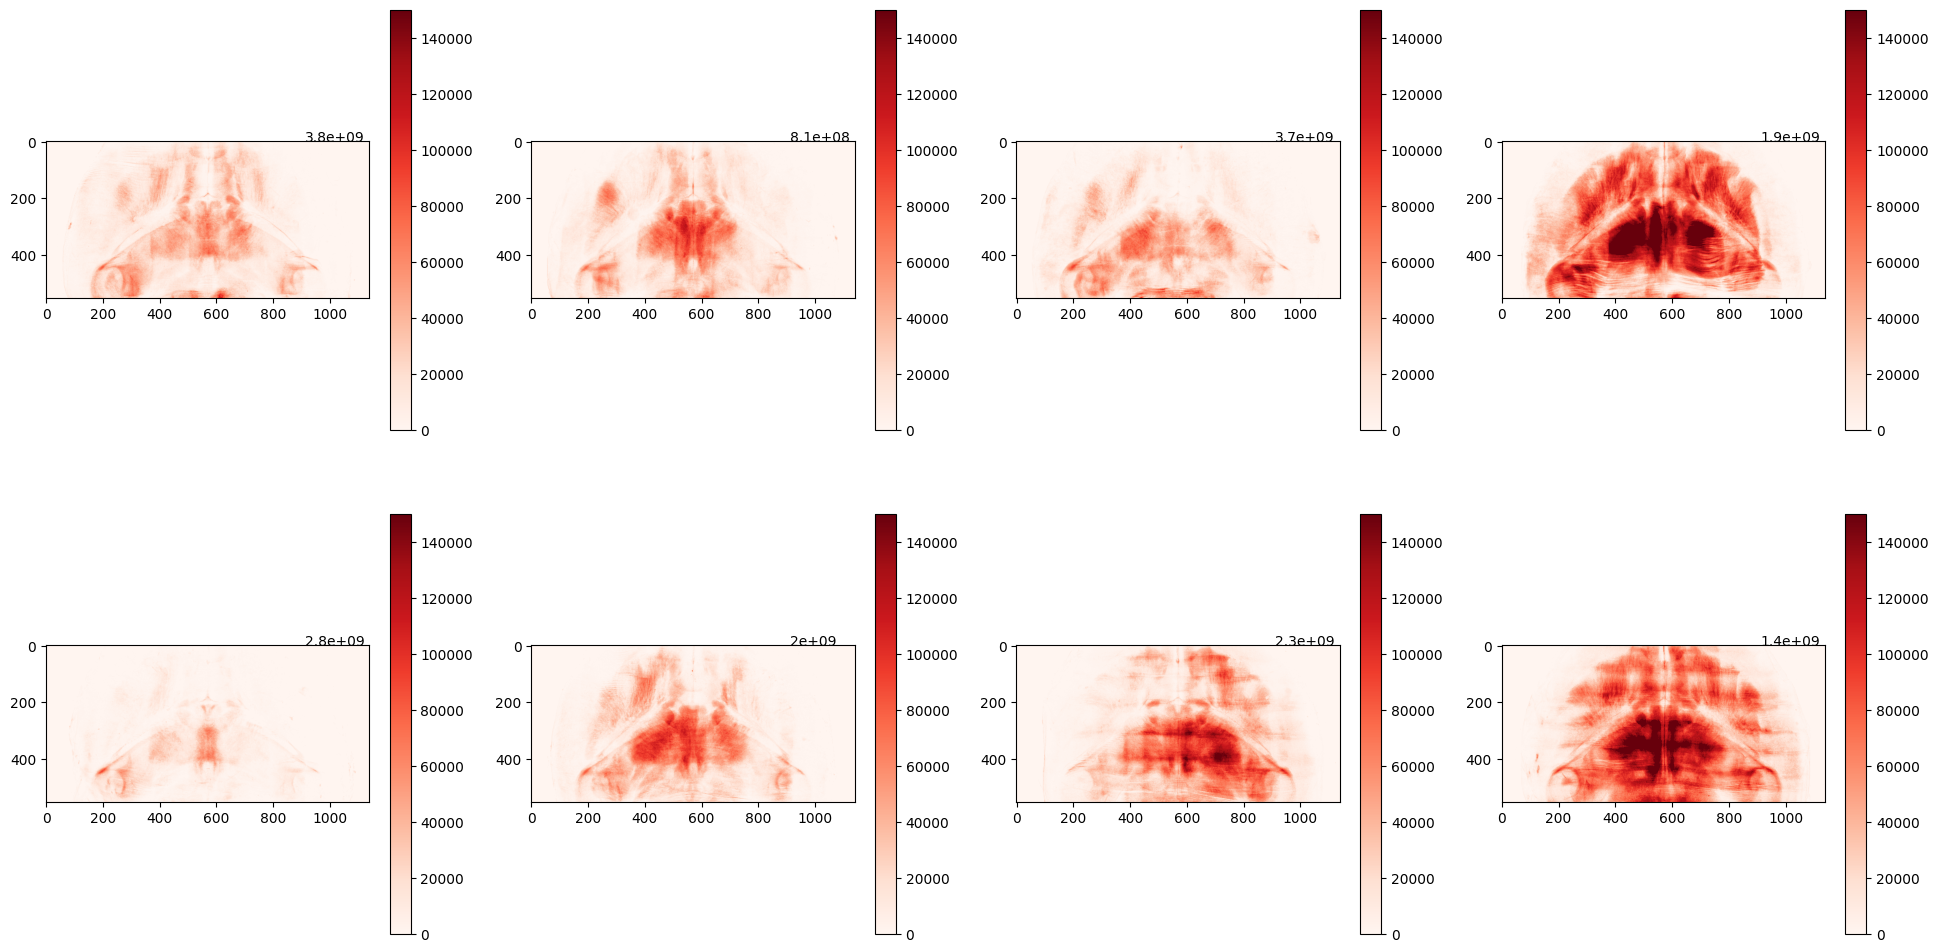

In [61]:
row_width = int(len(datasets)/2)
f, axs = plt.subplots(2, row_width, figsize=(row_width*6, 12))

for i, dataset in enumerate(datasets):
    row = 1 if i >= row_width else 0
    col = int(i % row_width)
    ax = axs[row, col]
    
    foreg = imread(f'braintracer/downsampled_data/reg_{dataset}_{channel_signal_name}.tiff')
    #backg = imread(f'braintracer/downsampled_data/reg_{dataset}_{channel_background_name}.tiff')
    subslice = foreg[350:900,:,:]
    subslice[subslice < 400] = 0
    subslice[subslice > 10_000] = 0
    im = np.sum(subslice, axis=1)
    
    cax = ax.imshow(im, cmap='Reds', vmax=150_000)
    plt.colorbar(cax)
    total_signal = np.sum(subslice.flatten())
    ax.text(float(ax.get_xlim()[1]) * 0.8, float(ax.get_ylim()[1]) * 0.6, f'{total_signal:.2g}')

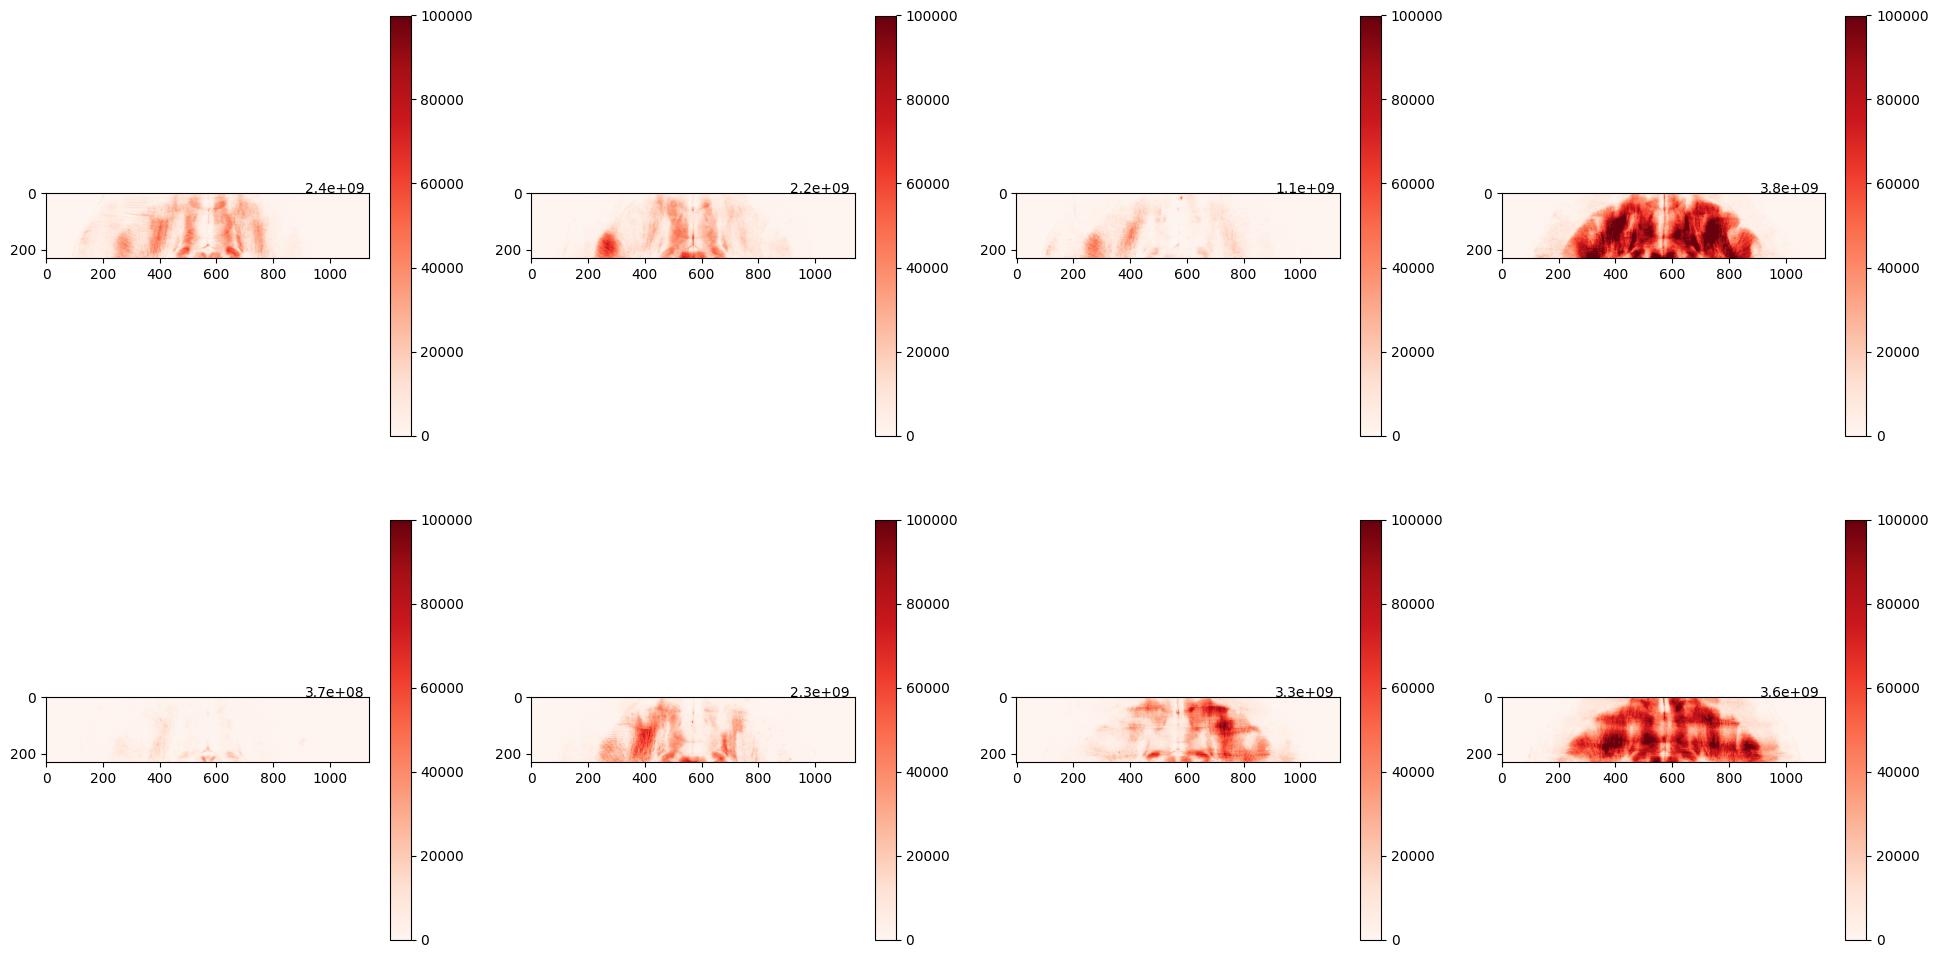

In [62]:
row_width = int(len(datasets)/2)
f, axs = plt.subplots(2, row_width, figsize=(row_width*6, 12))

for i, dataset in enumerate(datasets):
    row = 1 if i >= row_width else 0
    col = int(i % row_width)
    ax = axs[row, col]
    
    foreg = imread(f'braintracer/downsampled_data/reg_{dataset}_{channel_signal_name}.tiff')
    #backg = imread(f'braintracer/downsampled_data/reg_{dataset}_{channel_background_name}.tiff')
    subslice = foreg[350:580,:,:]
    subslice[subslice < 400] = 0
    subslice[subslice > 10_000] = 0
    im = np.sum(subslice, axis=1)
    
    cax = ax.imshow(im, cmap='Reds', vmax=100_000)
    plt.colorbar(cax)
    total_signal = np.sum(subslice.flatten())
    ax.text(float(ax.get_xlim()[1]) * 0.8, float(ax.get_ylim()[1]) * 0.6, f'{total_signal:.2g}')

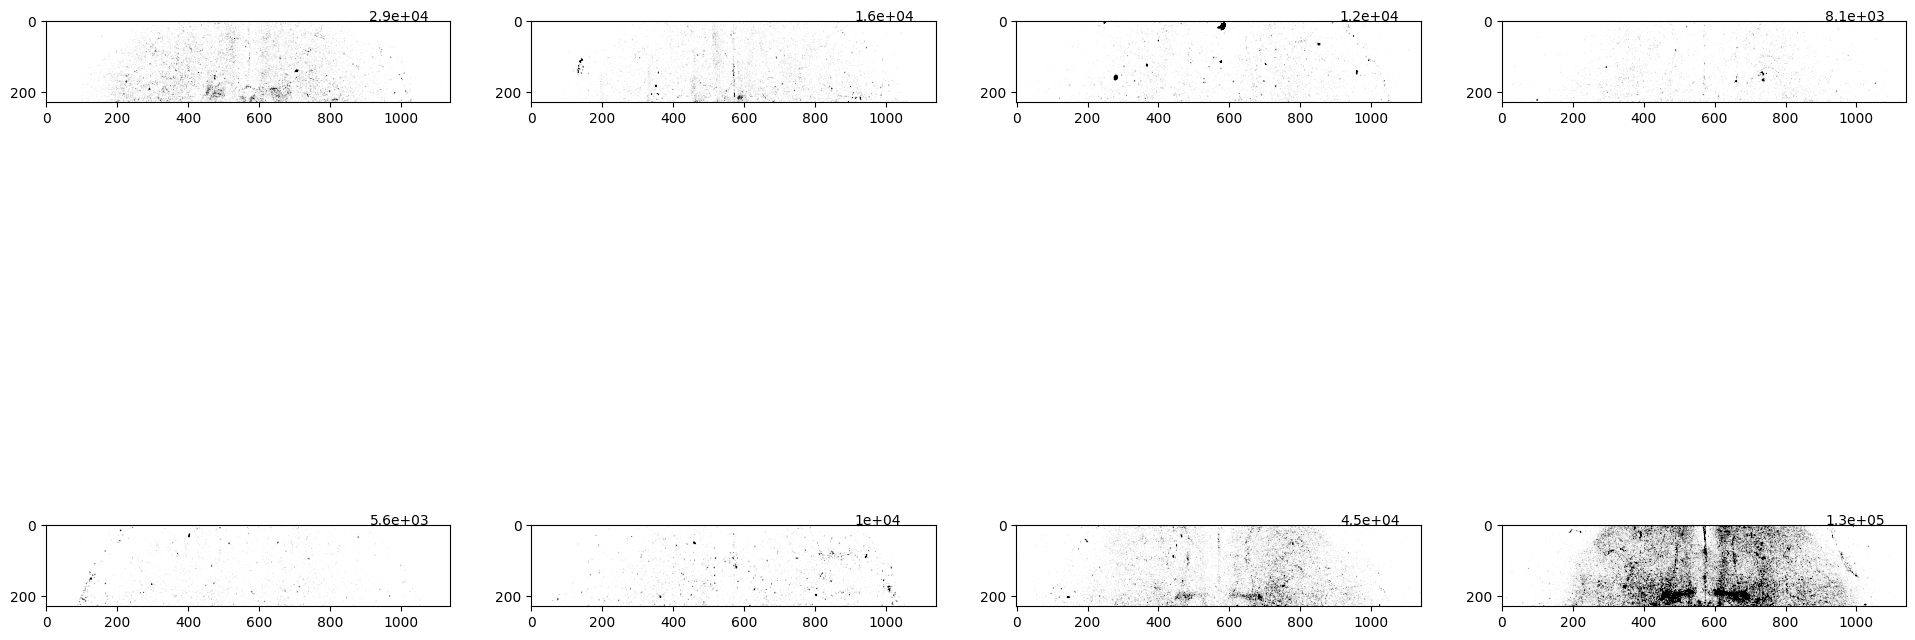

In [57]:
row_width = int(len(datasets)/2)
f, axs = plt.subplots(2, row_width, figsize=(row_width*6, 12))

for i, dataset in enumerate(datasets):
    row = 1 if i >= row_width else 0
    col = int(i % row_width)
    ax = axs[row, col]
    
    skimmed = True
    if skimmed:
        tc = open_binarised_coordinates(f'registered_skimmed_{dataset}_{channel_signal_name}')
    else:
        tc = open_binarised_coordinates(f'registered_{dataset}_{channel_signal_name}')
    
    atlas_space = np.zeros((1320, 800, 1140))
    for pt in tc:
        try:
            atlas_space[tuple(pt)] = 1 #print(f'coordinate was in bounds. coord = {coord}, val = {val}')
        except (IndexError) as e: #print(f'Index {z, y, x} was out of bounds.')
            pass
        
    subslice = atlas_space[350:580,:,:]

    ax.imshow(np.sum(subslice, axis=1), cmap='Greys', vmax=2)
    
    total_signal = np.sum(subslice.flatten())
    ax.text(float(ax.get_xlim()[1]) * 0.8, float(ax.get_ylim()[1]) * 0.6, f'{total_signal:.2g}')